In [60]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [87]:
df1 = pd.read_csv("faithful.csv", usecols=[1, 2])
df2 = pd.read_csv("PCA_predictions.csv")
df3 = pd.read_csv("EPCA_predictions.csv")

df2.rename(columns={'x1': 'eruptions', 'x2': 'waiting'}, inplace=True)
df3.rename(columns={'x1': 'eruptions', 'x2': 'waiting'}, inplace=True)

df1['Legend'] = "Original"
df2['Legend'] = "PCA"
df3['Legend'] = "EPCA"

df = pd.concat([df1, df2, df3])
df.head()

,eruptions,waiting,Legend
0,3.600,79.0,Original
1,1.800,54.0,Original
2,3.333,74.0,Original
3,2.283,62.0,Original
4,4.533,85.0,Original


<Figure size 3840x2880 with 0 Axes>

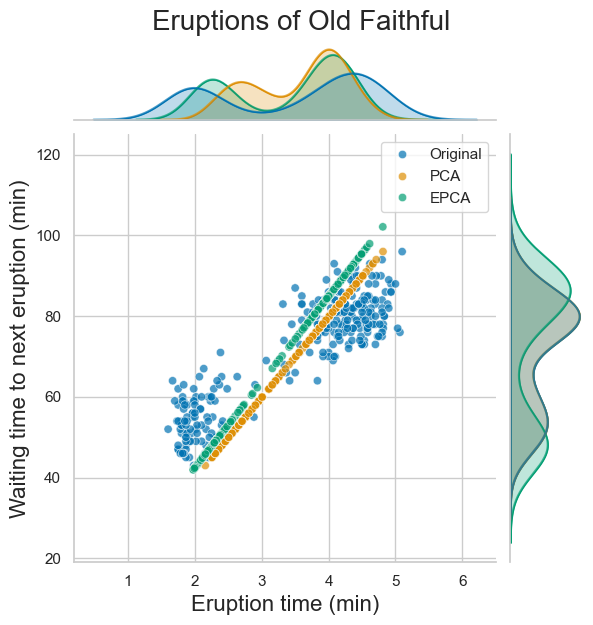

In [96]:
sns.set_theme(style="whitegrid")
plt.figure(dpi=600)

# Create the joint plot with enhanced aesthetics
g = sns.jointplot(
    data=df, 
    x="eruptions", 
    y="waiting", 
    hue="Legend", 
    palette="colorblind",
    alpha=0.7
)

g.plot_marginals(sns.kdeplot, color="teal", fill=False, alpha=0.7)
g.set_axis_labels('Eruption time (min)', 'Waiting time to next eruption (min)', fontsize=16)
g.ax_joint.legend_.set_title(None)
g.ax_joint.grid(True)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)

plt.suptitle('Eruptions of Old Faithful', fontsize=20, y=1.03)

plt.savefig('eruptions_plot.png', dpi=600, bbox_inches='tight')

plt.show()